<a href="https://colab.research.google.com/github/JASLYSAGITH/Financial-Risk-Analysis/blob/main/Financial_Risk_for_Loan_Approval_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Financial Risk for Loan Approval**

##**Final Project**
### **Submitted By: JASLY SAGITH**

##**Project Overview**

Loan approval is a critical decision-making process for financial institutions, where assessing financial risk is essential to minimize defaults and ensure profitability

##**Project Objectives**


* Financial risk assessment in loan approval is critical for lenders to minimize losses and improve profitability. Combining traditional risk metrics (credit score, DTI) with AI-driven models can enhance accuracy in predicting loan defaults.
* Develop a regression model that prdict the financial risk score based on applicant data.



## **About Dataset**

This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment.

Risk Score Regression: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

* ApplicationDate: Loan application date

* Age: Applicant's age

* AnnualIncome: Yearly income

* CreditScore: Creditworthiness score

* EmploymentStatus: Job situation

* EducationLevel: Highest education attained

* Experience: Work experience

* LoanAmount: Requested loan size

* LoanDuration: Loan repayment period

* MaritalStatus: Applicant's marital state

* NumberOfDependents: Number of dependents

* HomeOwnershipStatus: Homeownership type

* MonthlyDebtPayments: Monthly debt obligations

* CreditCardUtilizationRate: Credit card usage percentage

* NumberOfOpenCreditLines: Active credit lines

* NumberOfCreditInquiries: Credit checks count

* DebtToIncomeRatio: Debt to income proportion

* BankruptcyHistory: Bankruptcy records

* LoanPurpose: Reason for loan

* PreviousLoanDefaults: Prior loan defaults

* PaymentHistory: Past payment behavior

* LengthOfCreditHistory: Credit history duration

* SavingsAccountBalance: Savings account amount

* CheckingAccountBalance: Checking account funds

* TotalAssets: Total owned assets

* TotalLiabilities: Total owed debts

* MonthlyIncome: Income per month

* UtilityBillsPaymentHistory: Utility payment record

* JobTenure: Job duration

* NetWorth: Total financial worth

* BaseInterestRate: Starting interest rate

* InterestRate: Applied interest rate

* MonthlyLoanPayment: Monthly loan payment

* TotalDebtToIncomeRatio: Total debt against income

* LoanApproved: Loan approval status

* RiskScore: Risk assessment score

##**Data Collection & Understanding**

In [1]:
# importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import boxcox
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV

### **1.Load the Dataset**

In [2]:
# Loading dataset

DF=pd.read_csv('Loan.csv')
DF

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [3]:
DF.shape

(20000, 36)

### **2. Exploring the data**

✍ Our dataset have 20000 rows and 35 columns.

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

✍

*   There is no missing values in the dataset
*   within 36 columns 6 columns are Objective type, 21 columns are integer values and there are 9 floating type columns.



##**Data Preprocessing & Analysis**

### **1. Handling Missing values**

Find missing values  in each column

In [5]:
DF.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


✍ results shows there is no missing values in each column.

In [6]:
DF.drop(['ApplicationDate'],axis=1,inplace=True) ## drop the unrelevant columns.

### **2. Handling Duplicates**

In [7]:
DF.duplicated().sum() #check for duplicates

np.int64(0)

### **3. Statistical Analysis of Data**

In [8]:

DF.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


✍
- statistical representation of dataset provide information regarding skewness and presence of outliers.
- The large difference between mean & Median represents the presence of outliers and skewness.
- In AnnualIncome column the difference between mean and median is high and mean >median. Indicates column is positively skewed/Right skewed.
- In Creditscore column Mean < median  indicates neagtively skewed / left skewed

#### **Histplot of Numerical Columns**

In [9]:
DF1=DF.copy()
DF.shape

(20000, 35)

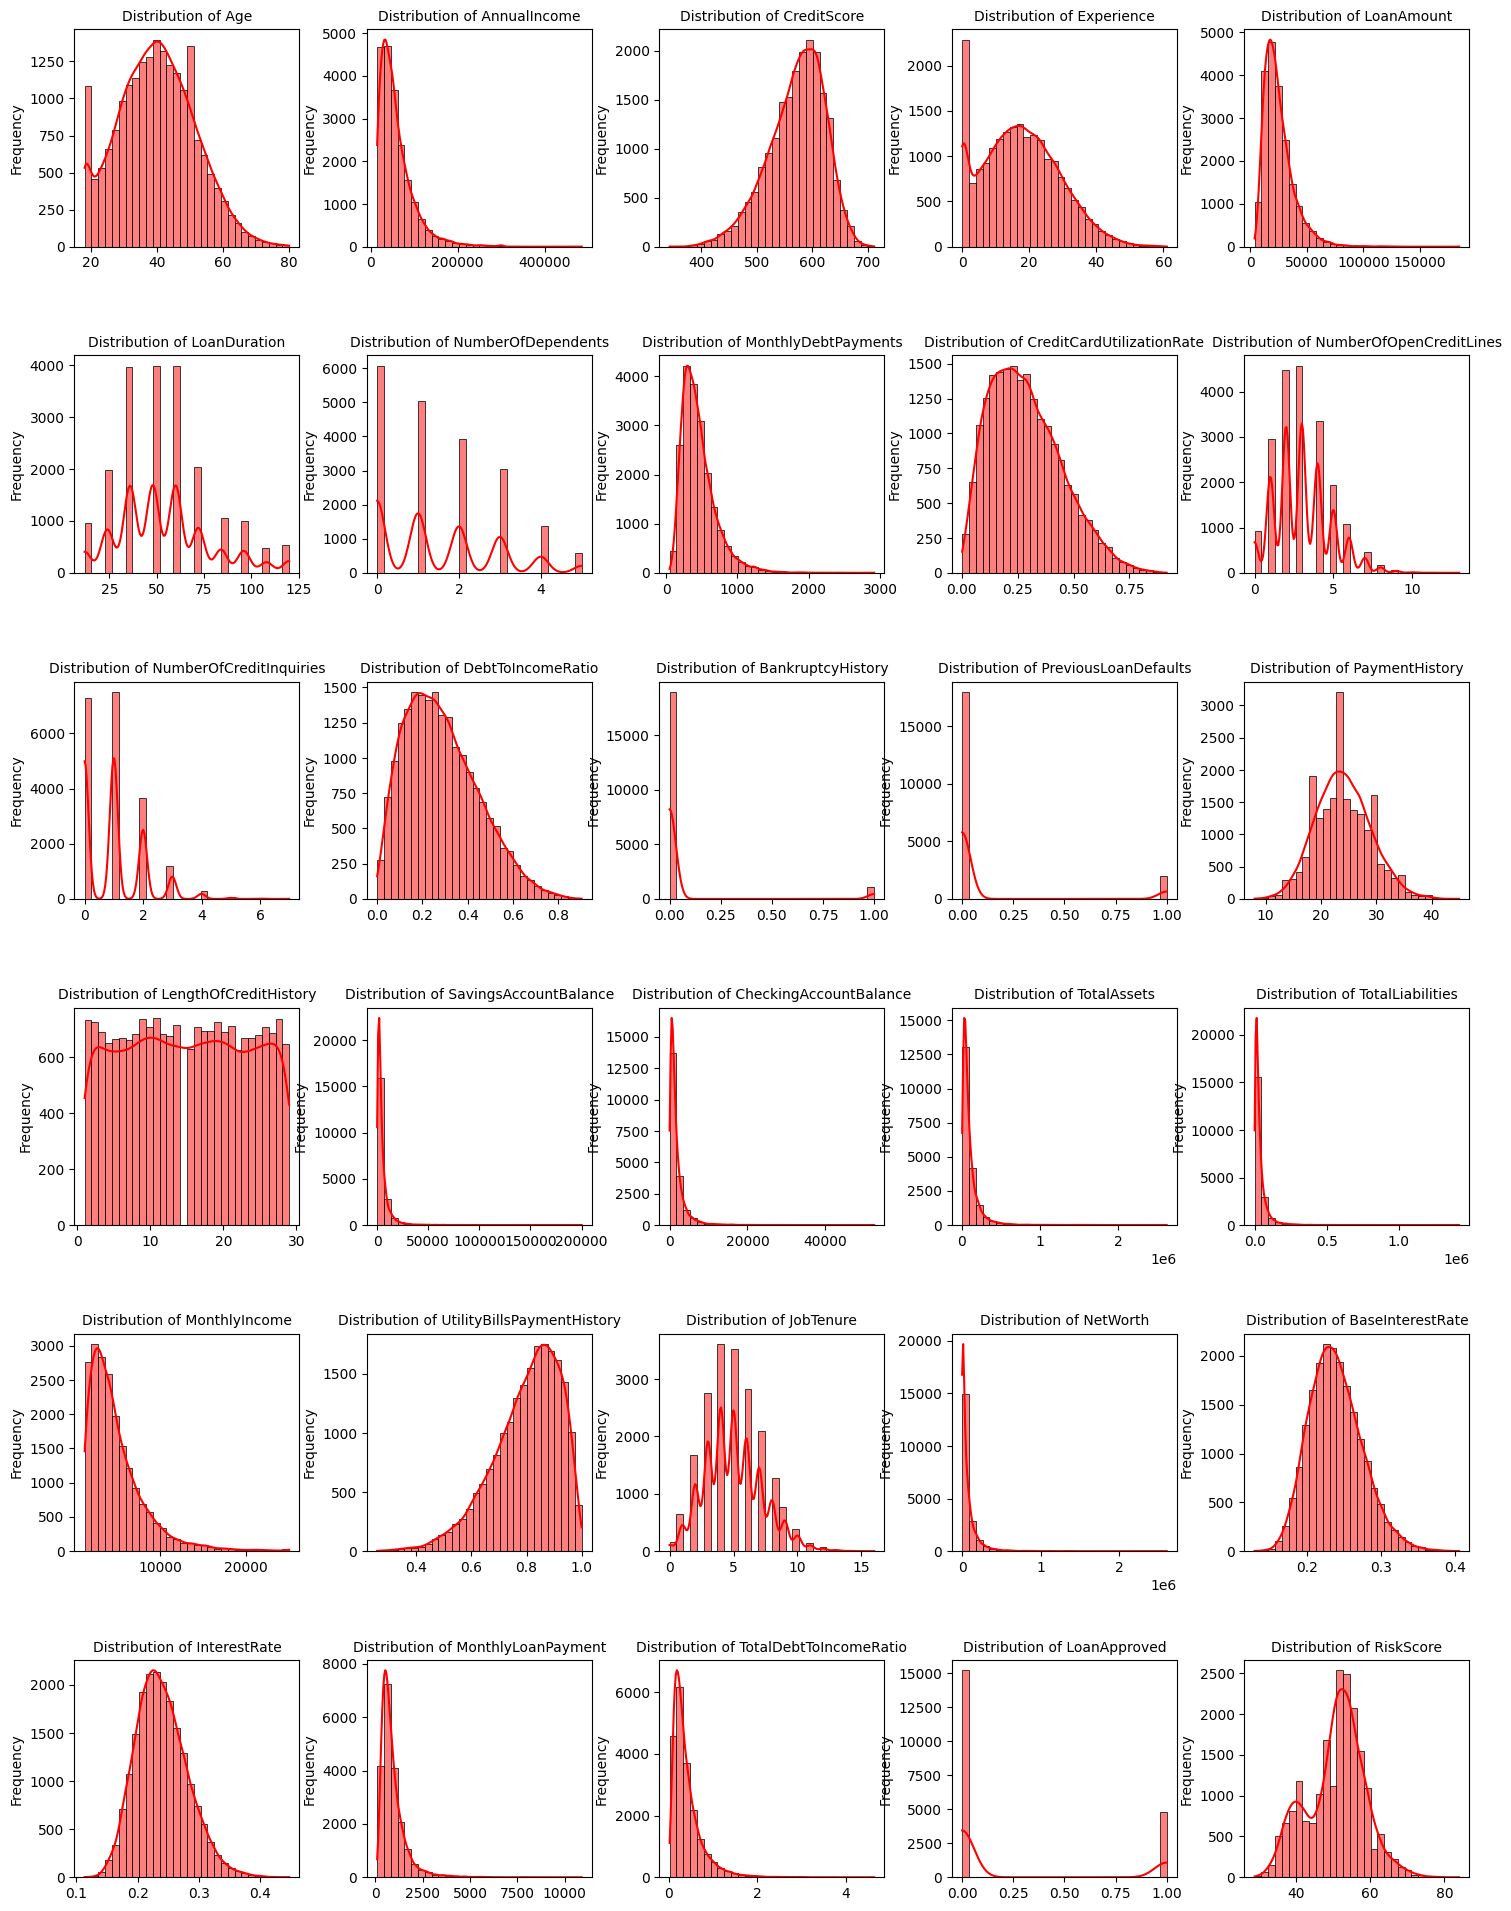

In [10]:
numerical_clmns=DF.select_dtypes("number").columns

plt.figure(figsize=(18, 24))
for i, feature in enumerate(numerical_clmns, 1):
    plt.subplot(6, 5, i)
    sns.histplot(DF[feature], bins=30, kde=True, color='red')
    plt.title(f"Distribution of {feature}", fontsize=10)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

✍
  Histplot repersentation of numerical columns shows the skewness in each column.
  Columns such as AnnualIncome, Loan Amount are positively skewed.

### **4. Handling Outliers**

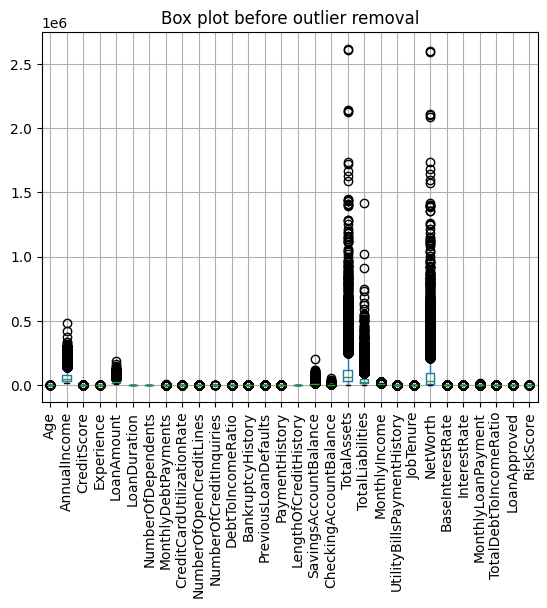

In [11]:
# Box plot representation of Outliers
DF.boxplot()
plt.xticks(rotation=90)
plt.title("Box plot before outlier removal")
plt.show()


✍ Presents of outliers in columns like total assets, Networth, TotalLiabilities are  very high. it will increases the skewness also.



In [12]:
# Ckecking the presents of skewness before removing outliers.
numerical_clmns=DF.select_dtypes("number").columns

DF[numerical_clmns].skew()

,0
Age,0.185964
AnnualIncome,2.088948
CreditScore,-0.596727
Experience,0.339981
LoanAmount,1.833688
LoanDuration,0.651330
NumberOfDependents,0.639919
MonthlyDebtPayments,1.653435
CreditCardUtilizationRate,0.601131
NumberOfOpenCreditLines,0.599662


Skewness in most of the columns are high when outliers are present

###**Removing Outliers using IQR Method**

In [13]:

def handle_outliers(DF, columns):
    for i in columns:
        if DF[i].dtype in ['float64', 'int64']:
            Q1 = DF[i].quantile(0.25)  # 1st quartile
            Q3 = DF[i].quantile(0.75)  # 3rd quartile
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            DF[i] = DF[i].clip(lower_bound, upper_bound)
    return DF

In [14]:
Cleaned_DF= handle_outliers(DF,DF.columns)
Cleaned_DF.shape

(20000, 35)

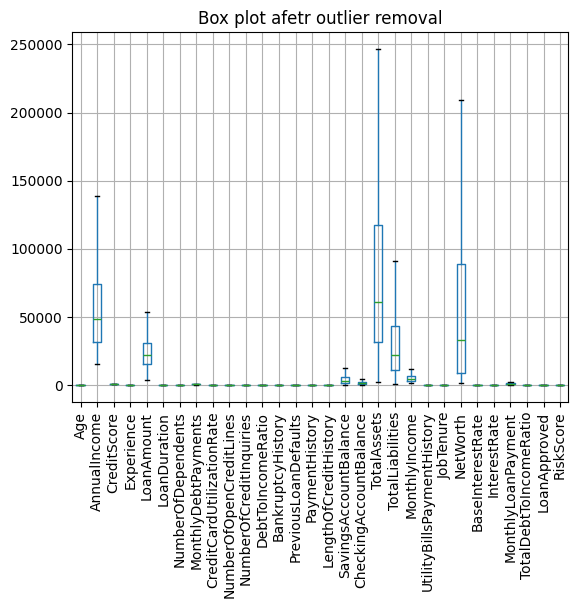

In [15]:
# Box plot representtion of Outliers after outlier removal
Cleaned_DF.boxplot()
plt.xticks(rotation=90)
plt.title("Box plot afetr outlier removal")
plt.show()


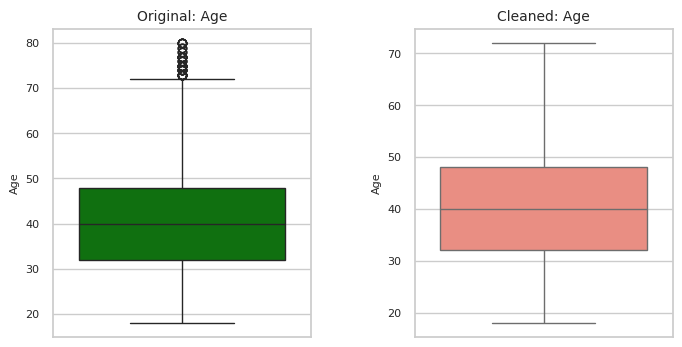

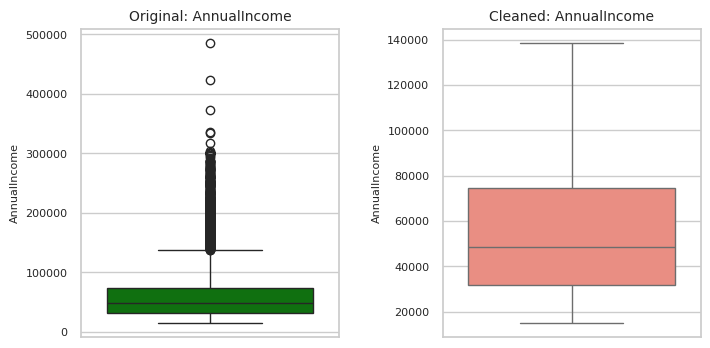

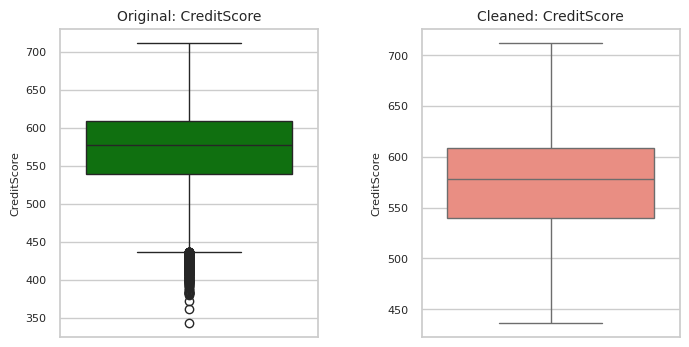

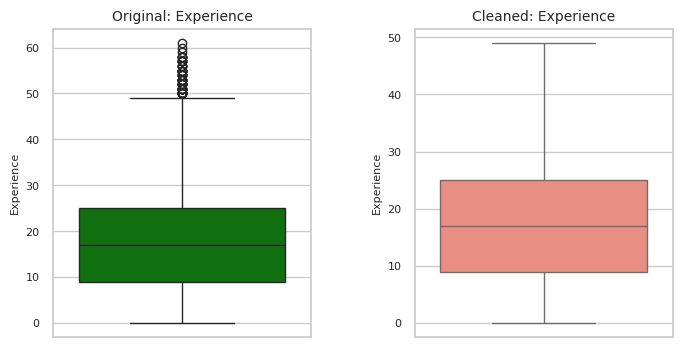

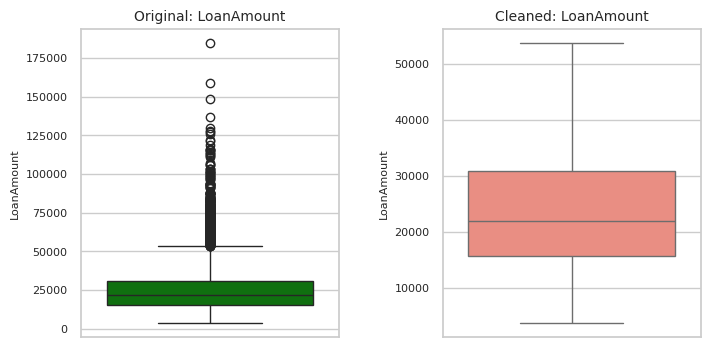

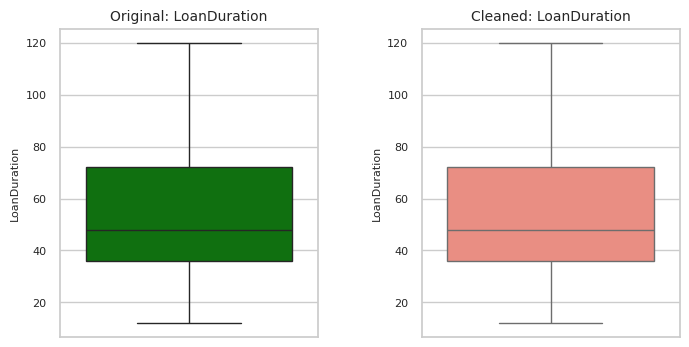

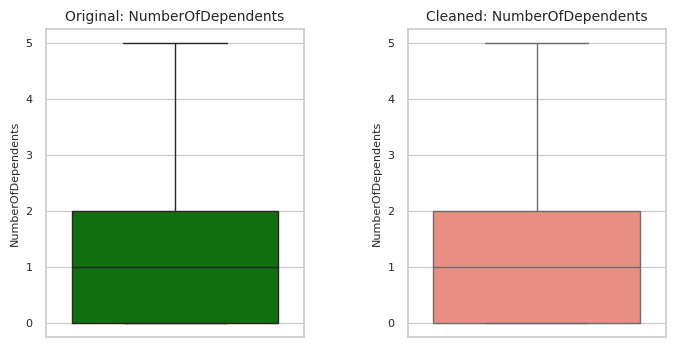

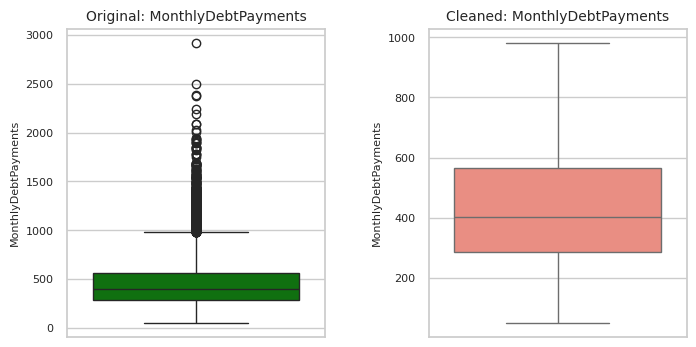

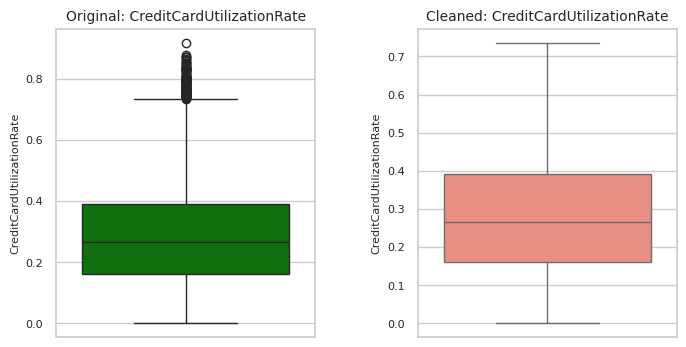

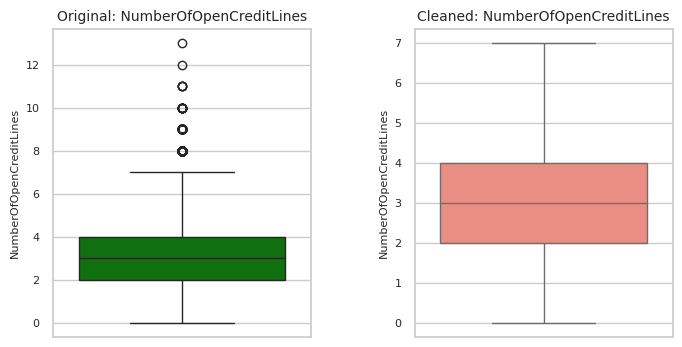

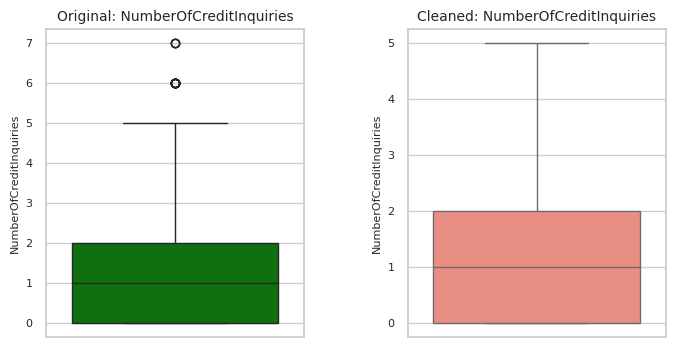

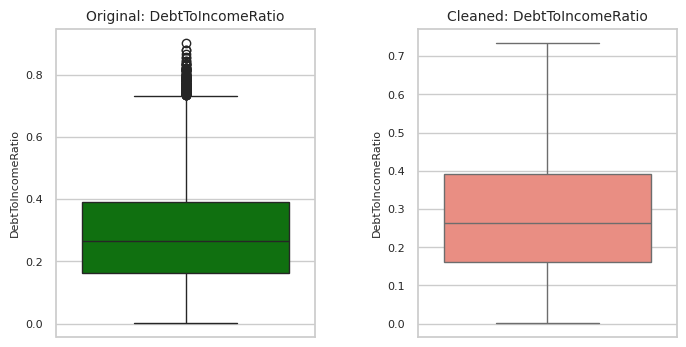

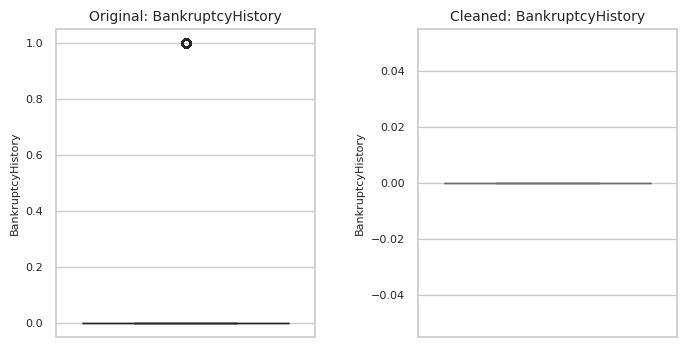

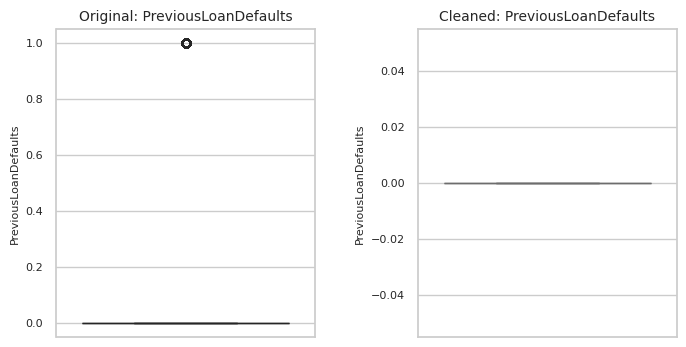

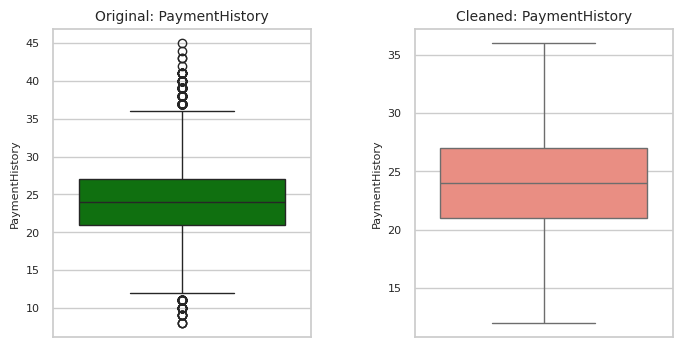

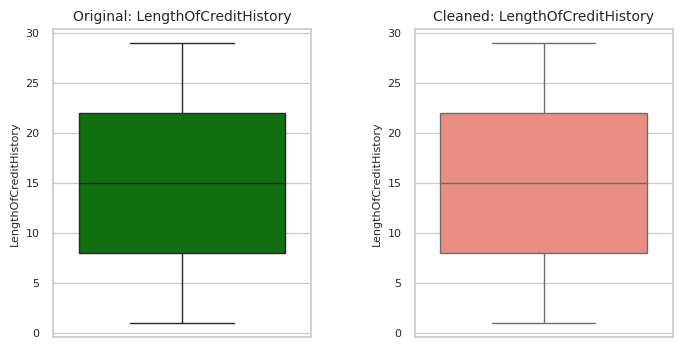

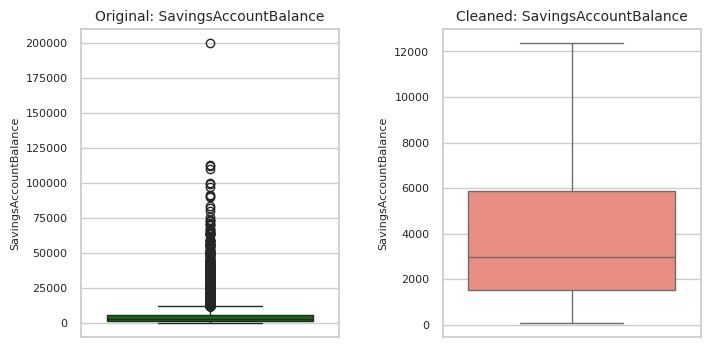

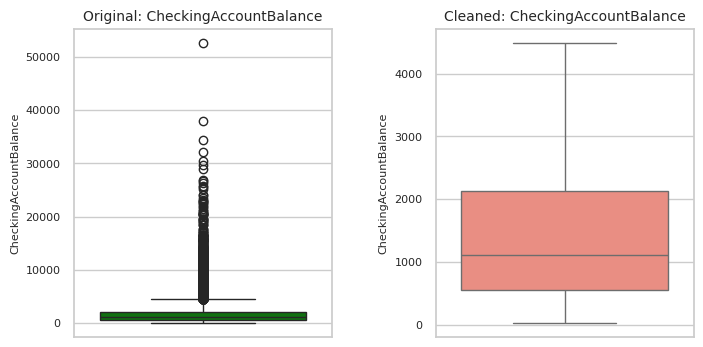

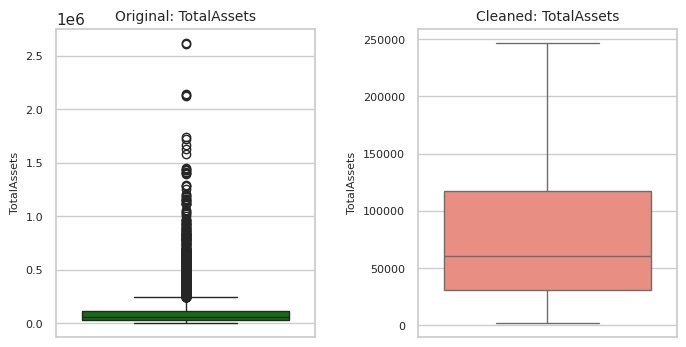

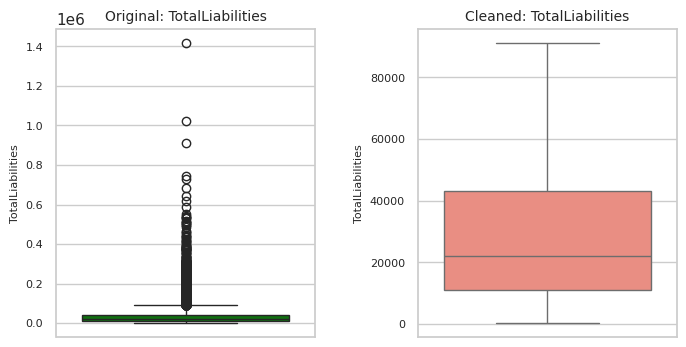

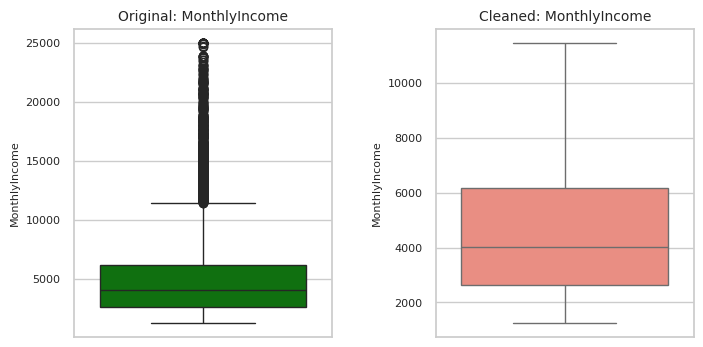

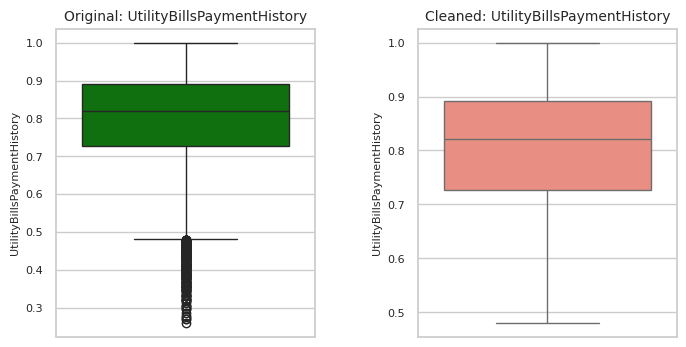

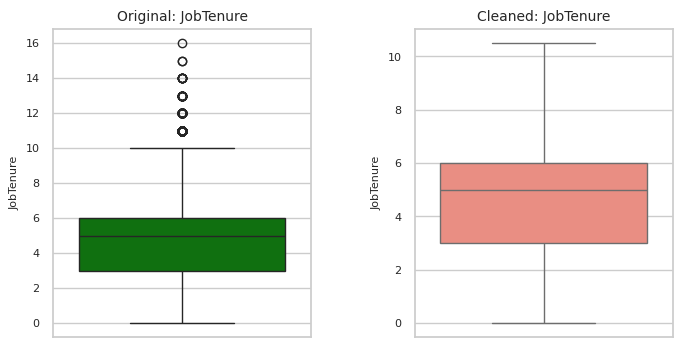

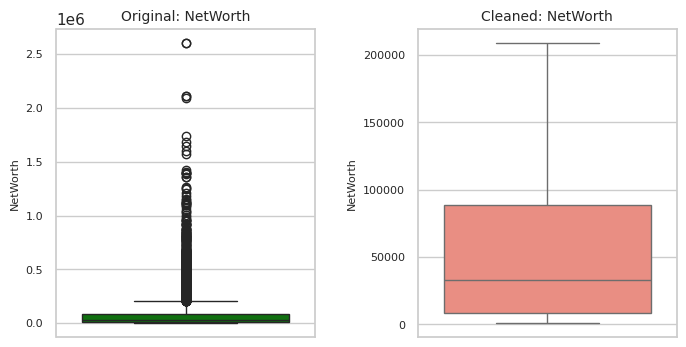

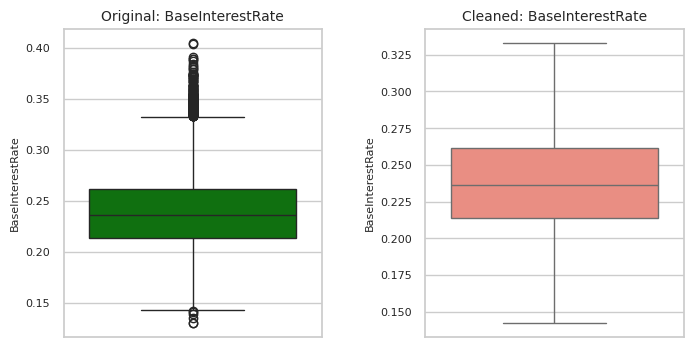

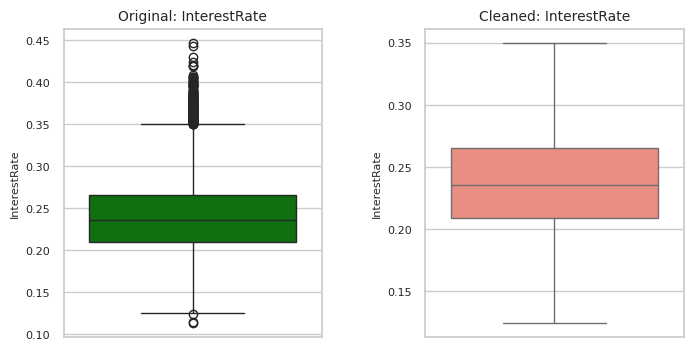

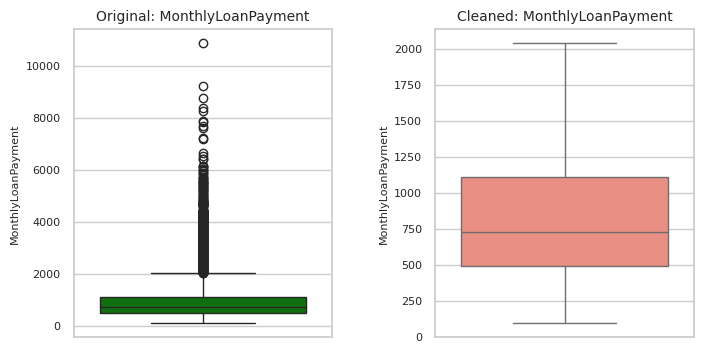

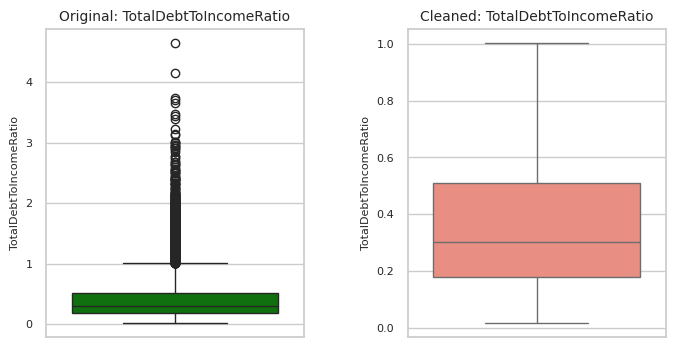

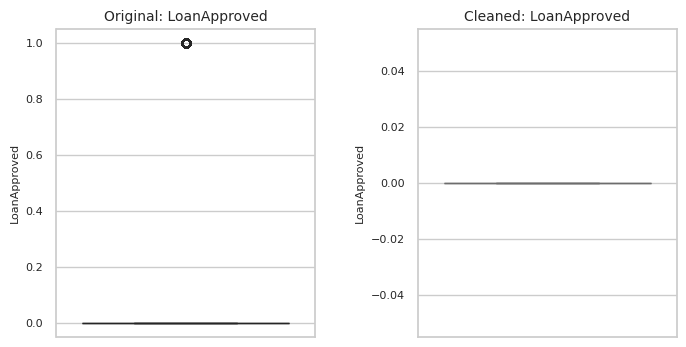

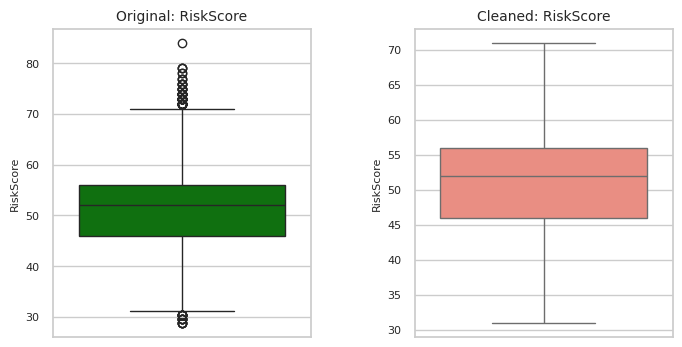

Dataset shape after being outliers removed: (20000, 35)
Dataset shape before being outliers removed: (20000, 35)


In [16]:
# Box plot of each numerical columns afetr outlier removal
# Set style for Seaborn
sns.set(style="whitegrid")

for i in numerical_clmns:

  plt.figure(figsize=(8, 4))

  plt.subplot(1, 2, 1)
  sns.boxplot(y=DF1[i], color='green')
  plt.title(f'Original: {i}', fontsize=10)  # Smaller title font
  plt.ylabel(i, fontsize=8)
  plt.xticks(fontsize=8)
  plt.yticks(fontsize=8)


  plt.subplot(1,2,2)
  sns.boxplot(y=Cleaned_DF[i], color='salmon')
  plt.title(f'Cleaned: {i}', fontsize=10)  # Smaller title font
  plt.ylabel(i, fontsize=8)
  plt.xticks(fontsize=8)
  plt.yticks(fontsize=8)


   # Show plots
  plt.subplots_adjust(wspace=0.4)
  plt.show()


print("Dataset shape after being outliers removed:",Cleaned_DF.shape)
print("Dataset shape before being outliers removed:",DF1.shape)



## **5. Handling Skewness**

In [17]:
# Skewness after outlier removal
numerical_clmns=DF.select_dtypes("number").columns

skewed_value=DF[numerical_clmns].skew()
skewed_value

,0
Age,0.162515
AnnualIncome,0.965652
CreditScore,-0.509645
Experience,0.308528
LoanAmount,0.853581
LoanDuration,0.651330
NumberOfDependents,0.639919
MonthlyDebtPayments,0.840155
CreditCardUtilizationRate,0.560002
NumberOfOpenCreditLines,0.408224


✍skewnes is reduced in most of the Columns after removing outliers.

**Positive skewness** : columns like SavingsAccountBalance, Total assets, TotalLiabilities shows positive skewness.
**Negative Skewness** : columns like UtilityBillsPaymentHistory	, CreditScore shows moderate negative skewness

In [18]:
skewed_cols = skewed_value[abs(skewed_value) > 0.5].index

In [19]:

# Treating skewness
for col in skewed_cols:
    if Cleaned_DF[col].min() == 0:  # If column has 0 values, use log1p to avoid log(0) issues
        Cleaned_DF[col] = np.log1p(Cleaned_DF[col])  # log(1 + x)
    elif skewed_value[col] > 1:  # Highly right-skewed
        Cleaned_DF[col] = np.log1p(Cleaned_DF[col])
    elif 0.5 < skewed_value[col] <= 1:  # Moderately right-skewed
        Cleaned_DF[col] = np.sqrt(Cleaned_DF[col])
    elif skewed_value[col] < -0.5:  # Left-skewed
       Cleaned_DF[col] = np.power(Cleaned_DF[col], 2)  # Power transformation
    else:
        Cleaned_DF[col], _ = boxcox(Cleaned_DF[col] + 1)  # Box-Cox Transformation for general skewness

In [20]:
Cleaned_DF[numerical_clmns].skew()

,0
Age,0.162515
AnnualIncome,0.477768
CreditScore,-0.289295
Experience,0.308528
LoanAmount,0.376962
LoanDuration,0.017966
NumberOfDependents,-0.083025
MonthlyDebtPayments,0.357087
CreditCardUtilizationRate,-0.094862
NumberOfOpenCreditLines,0.408224


In [21]:
DF=Cleaned_DF



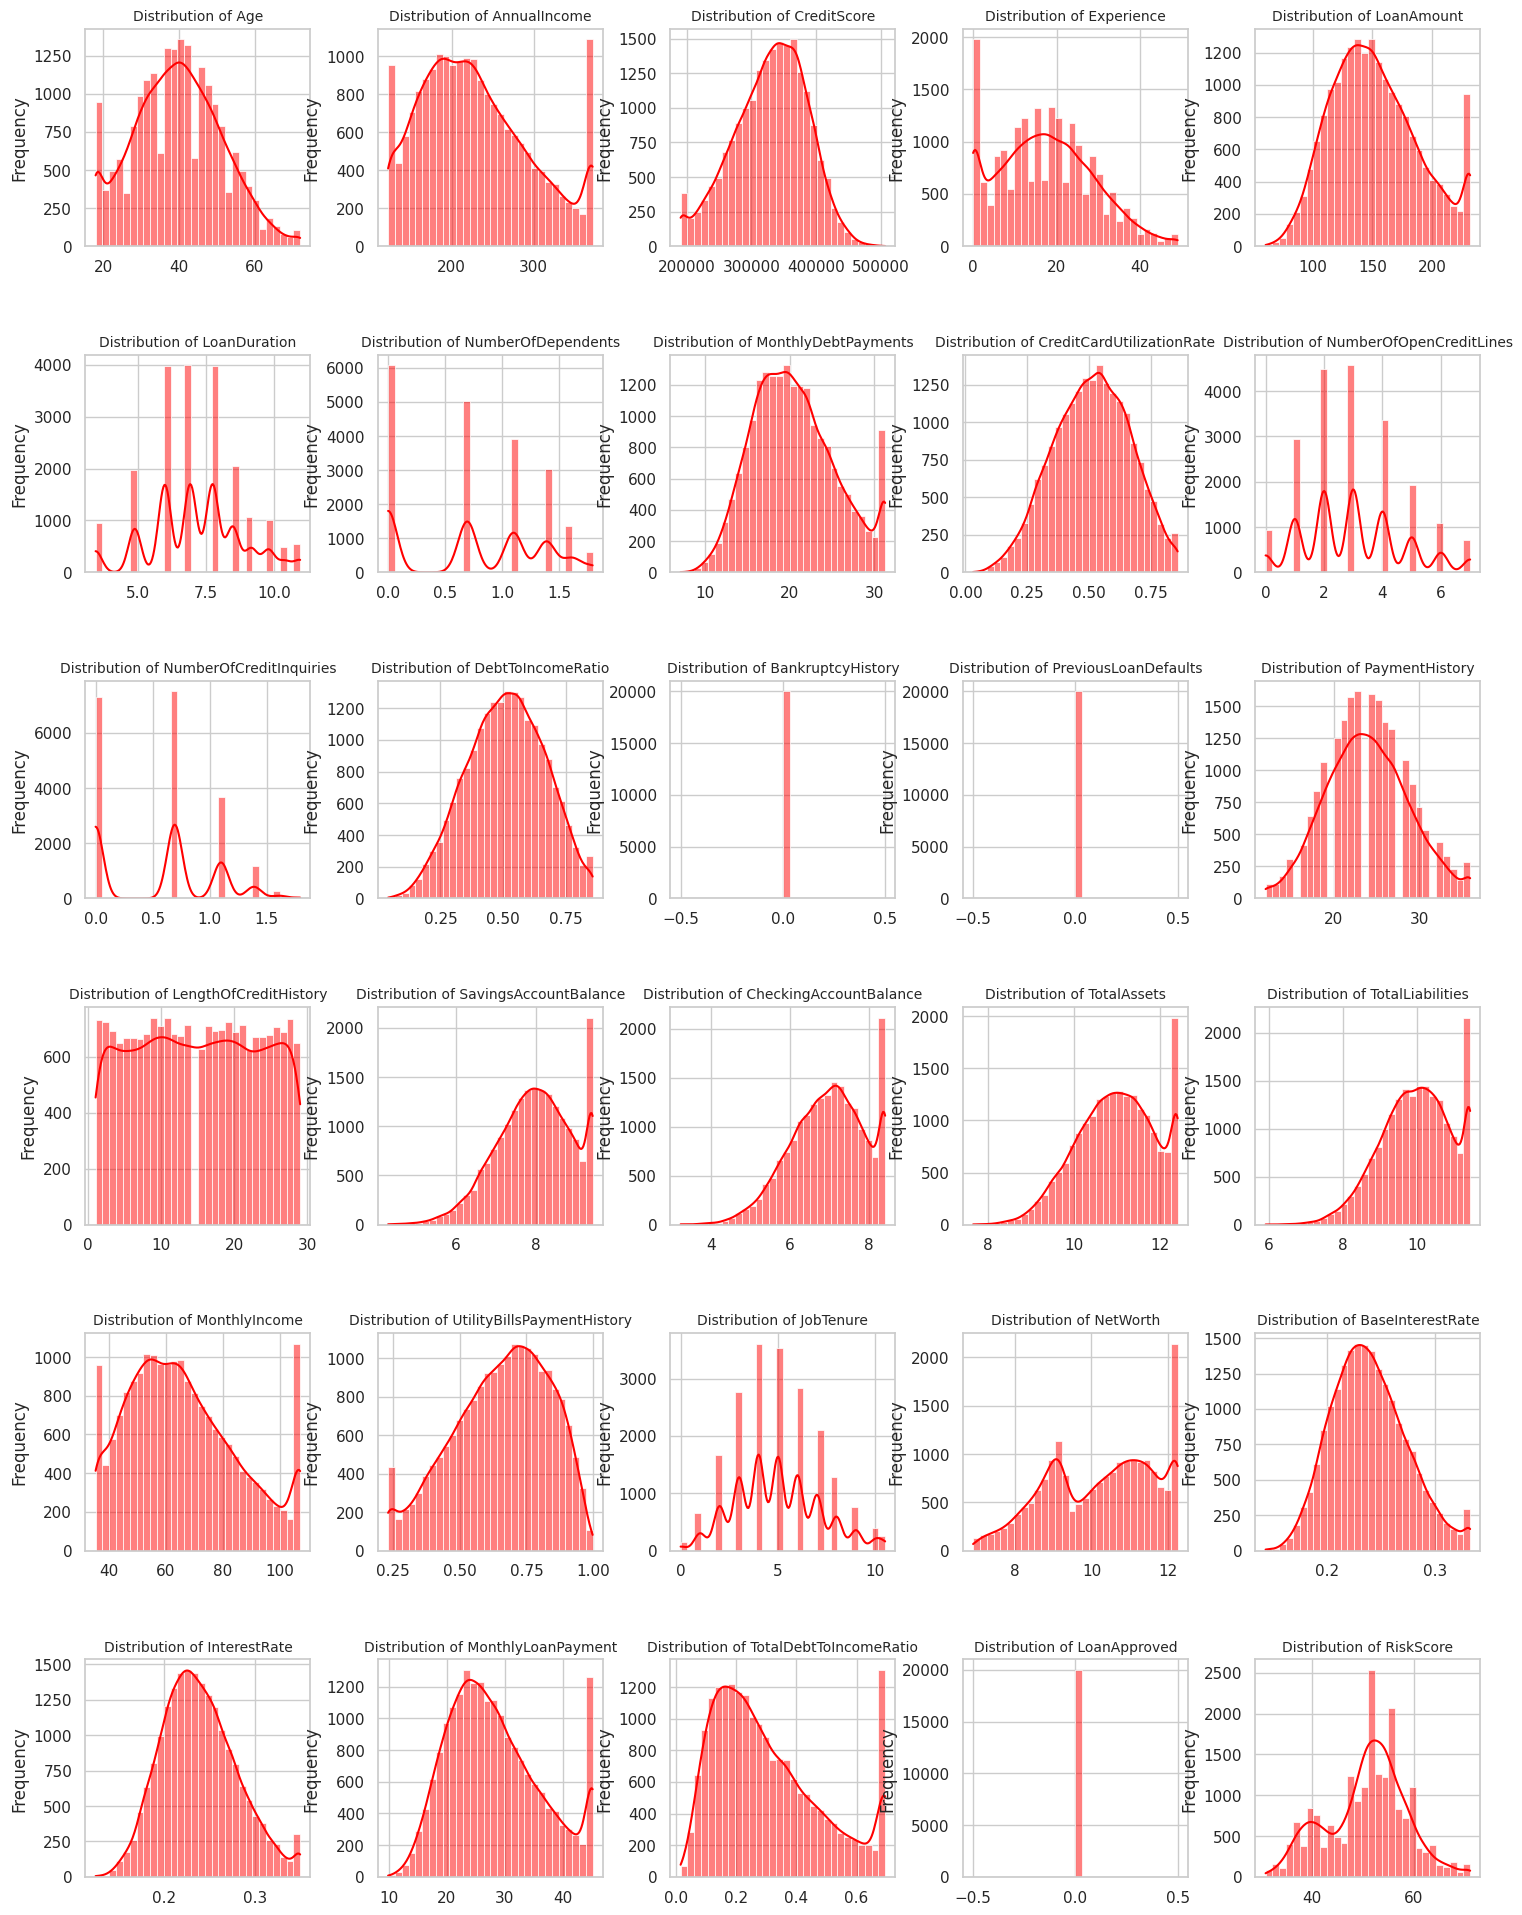

In [22]:
# Histplot representation after skewness treatment
plt.figure(figsize=(18, 24))
for i, feature in enumerate(numerical_clmns, 1):
    plt.subplot(6, 5, i)
    sns.histplot(DF[feature], bins=30, kde=True, color='red')
    plt.title(f"Distribution of {feature}", fontsize=10)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [23]:
DF.shape

(20000, 35)

##**Exploratory Data Analysis**

### **1.Count Plot**

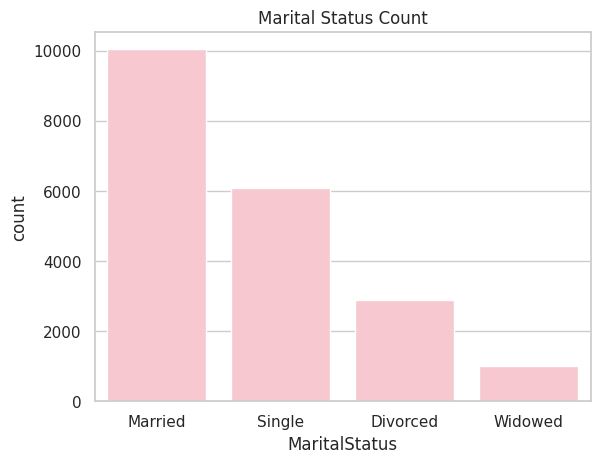

In [24]:
sns.countplot(data=DF, x='MaritalStatus', color='pink')
plt.title('Marital Status Count')
plt.show()

👁👁👁

* Most of the Appplicants are married.
* Widowed and Divorced apllicants form a significatly smaller portion of the dataset.
* This suggests that marital status may play a role in financial behavior or loan-seeking tendencies, and could be an important factor to consider in further segmentation or predictive modeling.

###**2. ScatterPlot**

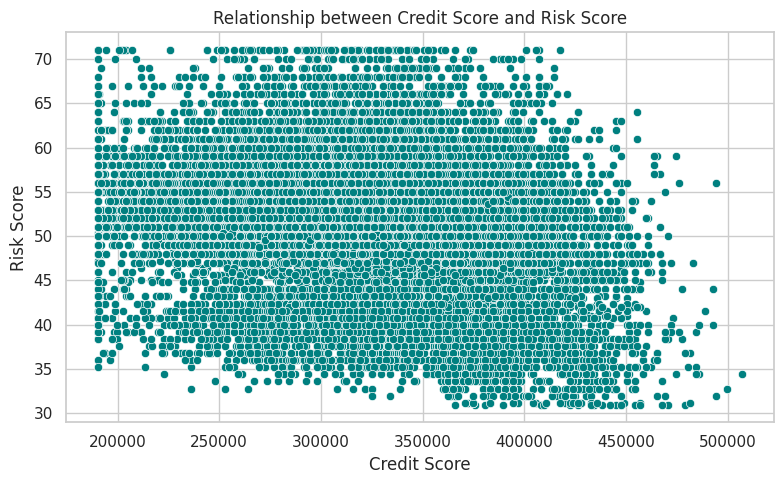

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=DF, x='CreditScore', y='RiskScore', color='teal')

plt.title('Relationship between Credit Score and Risk Score')
plt.xlabel('Credit Score')
plt.ylabel('Risk Score')
plt.tight_layout()
plt.show()

👁👁👁
* The points are widely spread across the credit score range (roughly 430 to 700) with risk scores mostly between 35 and 65.

* There’s no clear upward or downward trend — suggesting credit score and risk score are not strongly linearly related.

###**3. BoxPlot**

<ipython-input-26-db0063605fe6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EmploymentStatus', y='RiskScore', data=DF, palette='Set2')


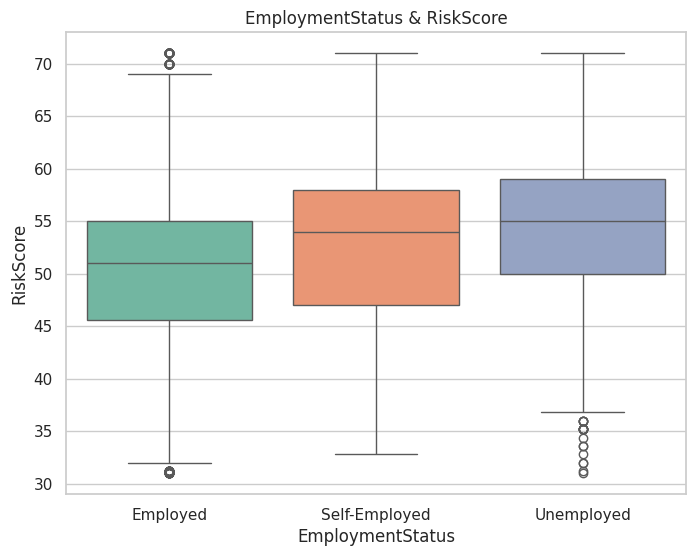

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EmploymentStatus', y='RiskScore', data=DF, palette='Set2')


plt.title('EmploymentStatus & RiskScore')
plt.xlabel('EmploymentStatus')
plt.ylabel('RiskScore')


plt.show()

👁👁👁
- Risk score of empolyed catogory is less compared to others
-Unemployed have highest Riskscore

###**4.Heat Map**

In [27]:
# Corelation Matrix
correlation_matrix=DF[numerical_clmns].corr()
correlation_matrix

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
Age,1.000000,0.155004,0.332410,0.982943,-0.005598,-0.005931,-0.002036,0.011694,-0.000083,-0.001103,...,0.154441,-0.006190,-0.000360,0.005369,-0.239289,-0.202808,-0.025714,-0.129438,NaN,-0.164714
AnnualIncome,0.155004,1.000000,0.120368,0.156518,-0.006952,-0.001501,-0.000541,0.003939,-0.008237,-0.012439,...,0.995521,-0.010107,-0.000956,0.004896,-0.087391,-0.074368,-0.013586,-0.748120,NaN,-0.500858
CreditScore,0.332410,0.120368,1.000000,0.337212,-0.011654,0.000448,-0.012361,0.010001,-0.008445,-0.008516,...,0.120157,-0.006715,0.007772,0.001115,-0.720802,-0.596791,-0.081573,-0.131718,NaN,-0.249209
Experience,0.982943,0.156518,0.337212,1.000000,-0.005425,-0.006570,-0.001922,0.013865,-0.000272,-0.002041,...,0.156035,-0.007024,-0.000424,0.005236,-0.243050,-0.206197,-0.026307,-0.130380,NaN,-0.166902
LoanAmount,-0.005598,-0.006952,-0.011654,-0.005425,1.000000,0.001249,-0.007784,0.017826,0.002345,-0.001774,...,-0.007029,-0.014862,0.001536,-0.002685,0.364533,0.305088,0.851249,0.445615,NaN,0.151052
LoanDuration,-0.005931,-0.001501,0.000448,-0.006570,0.001249,1.000000,-0.001905,-0.000318,-0.004449,0.002284,...,-0.000891,-0.008302,0.002069,-0.003555,0.572396,0.480770,-0.441986,-0.235269,NaN,0.049715
NumberOfDependents,-0.002036,-0.000541,-0.012361,-0.001922,-0.007784,-0.001905,1.000000,-0.001399,0.008311,0.004773,...,-0.000466,0.005716,0.011341,-0.009445,0.004878,0.005485,-0.005728,-0.004169,NaN,0.003476
MonthlyDebtPayments,0.011694,0.003939,0.010001,0.013865,0.017826,-0.000318,-0.001399,1.000000,0.001948,0.005546,...,0.004257,0.002134,0.006906,0.005392,-0.000822,0.002427,0.014217,0.233106,NaN,0.038120
CreditCardUtilizationRate,-0.000083,-0.008237,-0.008445,-0.000272,0.002345,-0.004449,0.008311,0.001948,1.000000,0.001439,...,-0.007786,0.013023,-0.005896,-0.002452,0.004344,0.001416,0.005013,0.008906,NaN,0.102806
NumberOfOpenCreditLines,-0.001103,-0.012439,-0.008516,-0.002041,-0.001774,0.002284,0.004773,0.005546,0.001439,1.000000,...,-0.011885,-0.010965,0.007359,-0.003216,0.008436,0.009850,-0.000873,0.008918,NaN,0.007705


In [28]:
DF.drop(['BankruptcyHistory','PreviousLoanDefaults','LoanApproved'],axis=1,inplace=True)

Some columns in corelation matrix shows NaN, so we removed such columns.

In [29]:
numerical_clmns=DF.select_dtypes("number").columns

In [30]:
correlation_matrix=DF[numerical_clmns].corr()
correlation_matrix


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
Age,1.000000,0.155004,0.332410,0.982943,-0.005598,-0.005931,-0.002036,0.011694,-0.000083,-0.001103,...,-0.010029,0.154441,-0.006190,-0.000360,0.005369,-0.239289,-0.202808,-0.025714,-0.129438,-0.164714
AnnualIncome,0.155004,1.000000,0.120368,0.156518,-0.006952,-0.001501,-0.000541,0.003939,-0.008237,-0.012439,...,-0.006671,0.995521,-0.010107,-0.000956,0.004896,-0.087391,-0.074368,-0.013586,-0.748120,-0.500858
CreditScore,0.332410,0.120368,1.000000,0.337212,-0.011654,0.000448,-0.012361,0.010001,-0.008445,-0.008516,...,-0.007958,0.120157,-0.006715,0.007772,0.001115,-0.720802,-0.596791,-0.081573,-0.131718,-0.249209
Experience,0.982943,0.156518,0.337212,1.000000,-0.005425,-0.006570,-0.001922,0.013865,-0.000272,-0.002041,...,-0.009991,0.156035,-0.007024,-0.000424,0.005236,-0.243050,-0.206197,-0.026307,-0.130380,-0.166902
LoanAmount,-0.005598,-0.006952,-0.011654,-0.005425,1.000000,0.001249,-0.007784,0.017826,0.002345,-0.001774,...,-0.005880,-0.007029,-0.014862,0.001536,-0.002685,0.364533,0.305088,0.851249,0.445615,0.151052
LoanDuration,-0.005931,-0.001501,0.000448,-0.006570,0.001249,1.000000,-0.001905,-0.000318,-0.004449,0.002284,...,0.006242,-0.000891,-0.008302,0.002069,-0.003555,0.572396,0.480770,-0.441986,-0.235269,0.049715
NumberOfDependents,-0.002036,-0.000541,-0.012361,-0.001922,-0.007784,-0.001905,1.000000,-0.001399,0.008311,0.004773,...,0.021795,-0.000466,0.005716,0.011341,-0.009445,0.004878,0.005485,-0.005728,-0.004169,0.003476
MonthlyDebtPayments,0.011694,0.003939,0.010001,0.013865,0.017826,-0.000318,-0.001399,1.000000,0.001948,0.005546,...,0.003144,0.004257,0.002134,0.006906,0.005392,-0.000822,0.002427,0.014217,0.233106,0.038120
CreditCardUtilizationRate,-0.000083,-0.008237,-0.008445,-0.000272,0.002345,-0.004449,0.008311,0.001948,1.000000,0.001439,...,-0.008052,-0.007786,0.013023,-0.005896,-0.002452,0.004344,0.001416,0.005013,0.008906,0.102806
NumberOfOpenCreditLines,-0.001103,-0.012439,-0.008516,-0.002041,-0.001774,0.002284,0.004773,0.005546,0.001439,1.000000,...,-0.000274,-0.011885,-0.010965,0.007359,-0.003216,0.008436,0.009850,-0.000873,0.008918,0.007705


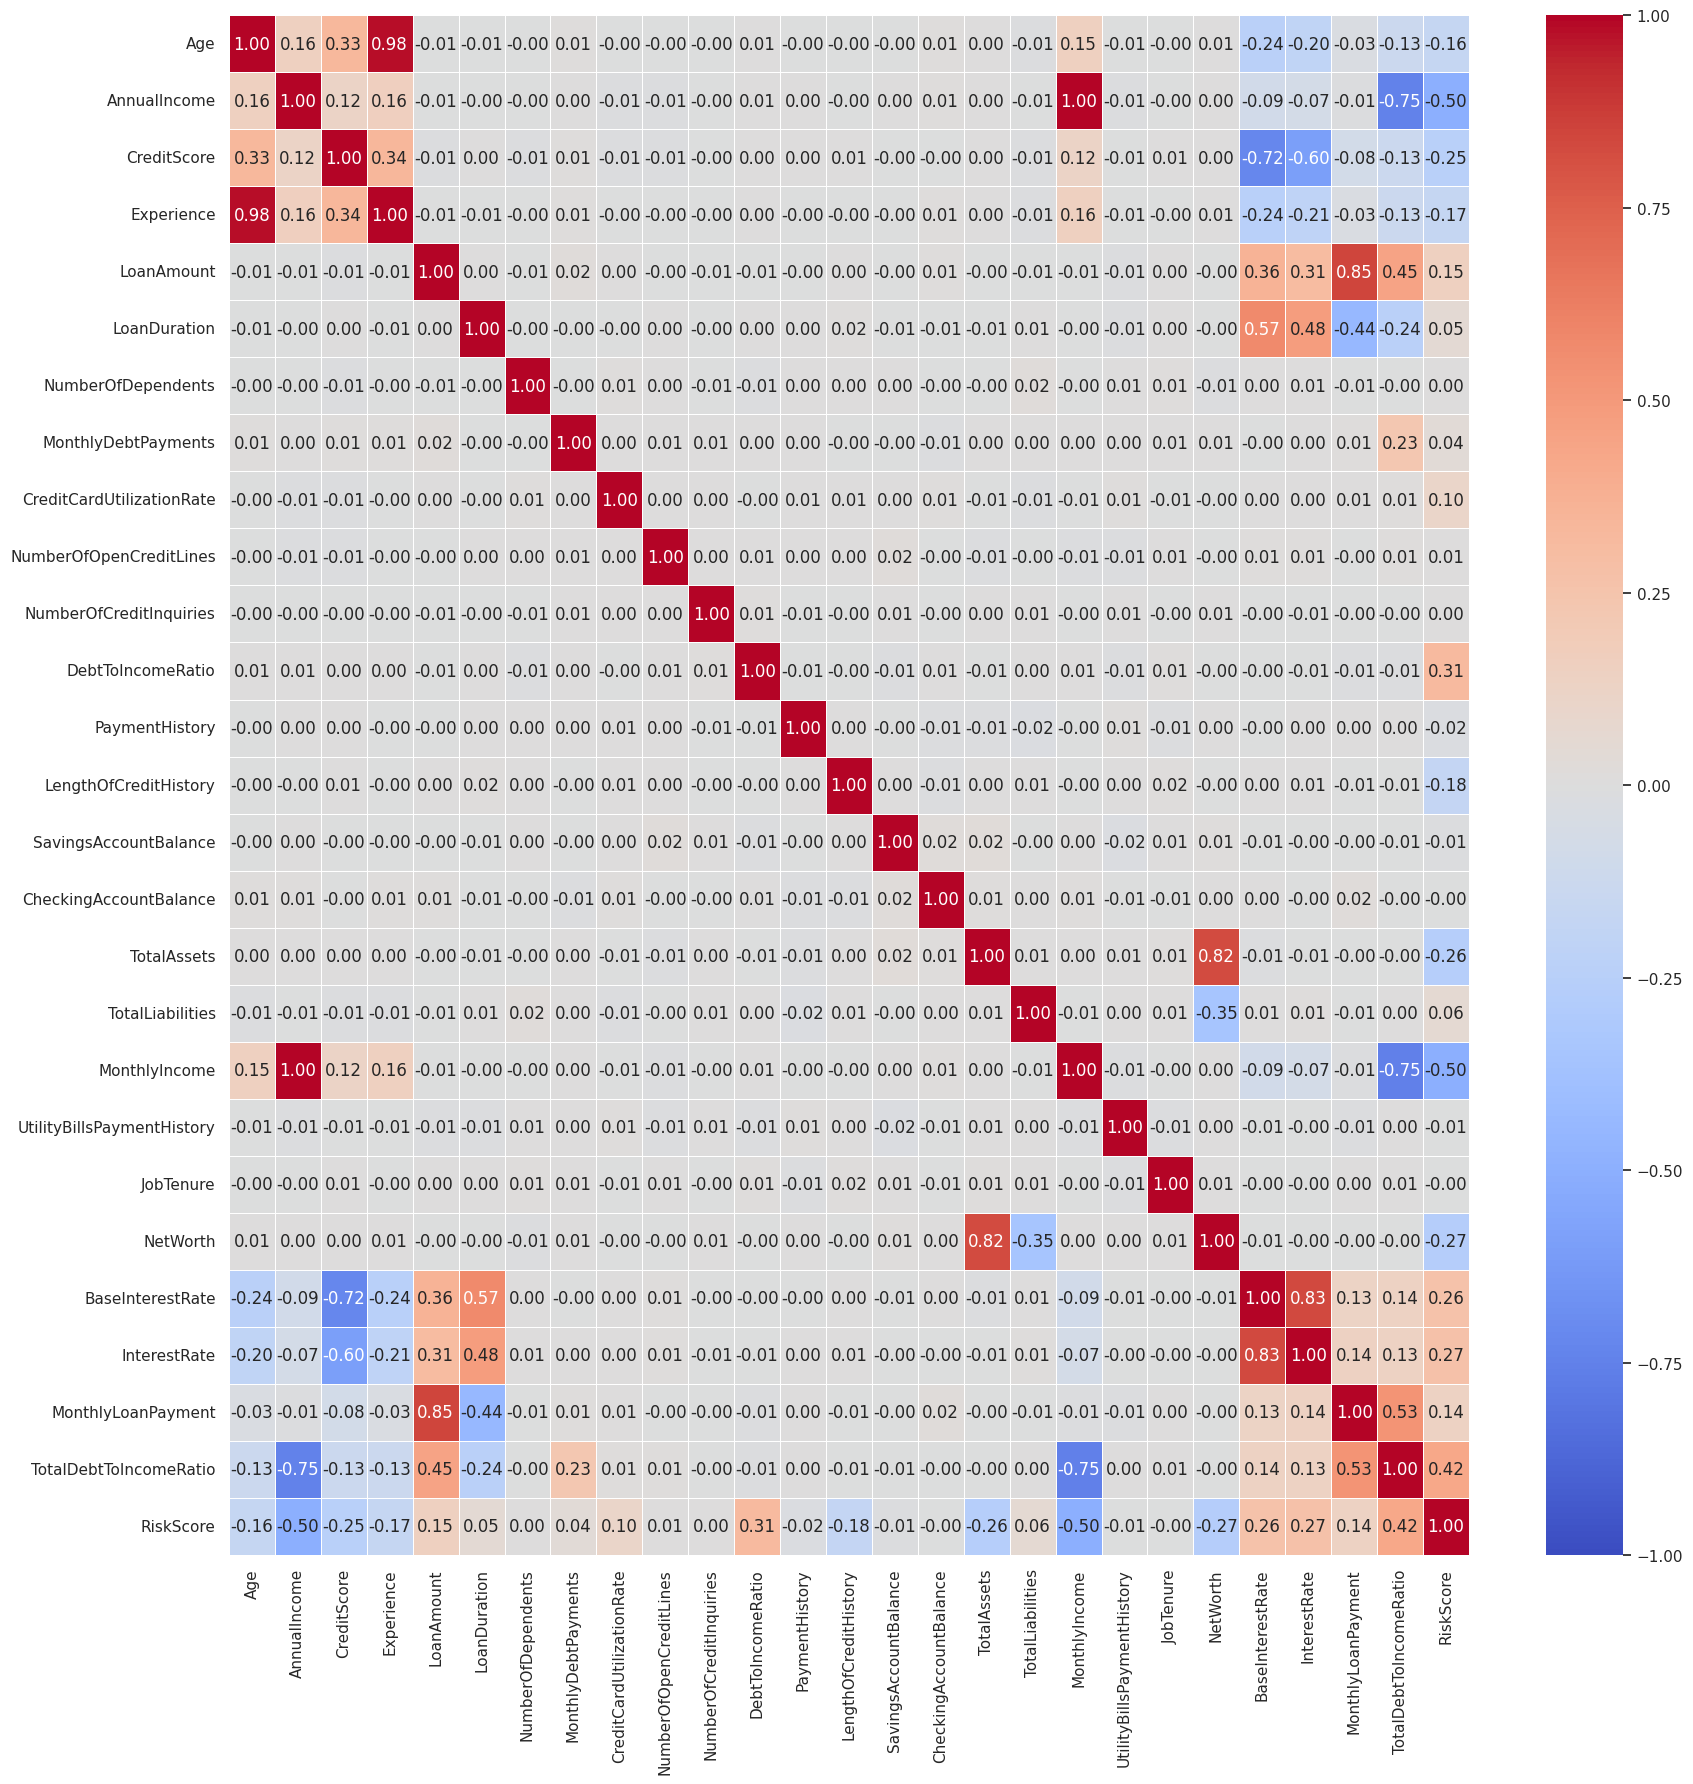

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
#plt.title('Correlation Heatmap')
plt.show()

**Strong Positive Correlations (close to +1):**
Age ↔ Experience: 0.98

Makes sense – older applicants generally have more work experience.

TotalAssets ↔ NetWorth: 0.92

Indicates that total assets significantly determine a person’s net worth.

LoanAmount ↔ MonthlyLoanPayment: 0.85

Larger loans naturally lead to higher monthly payments.

LoanAmount ↔ LoanDuration: 0.57

Longer loan durations are often associated with larger amounts.

InterestRate ↔ RiskScore: 0.42

Higher risk scores are linked to higher interest rates – expected behavior.

DebtToIncomeRatio ↔ RiskScore: 0.31

As debt grows relative to income, the risk increases.

**Strong Negative Correlations (close to -1):**
CreditScore ↔ RiskScore: -0.50

Better credit scores lead to lower risk scores — a crucial insight.

TotalDebtToIncomeRatio ↔ CreditScore: -0.75

Heavily indebted individuals tend to have poor credit scores.

TotalDebtToIncomeRatio ↔ RiskScore: 0.42

More debt = higher financial risk.

CreditScore ↔ InterestRate: -0.27

Better credit = lower interest rates – aligns with lending principles.

**Multicollinearity** :  AnnualInacome – MonthlyIncome
Multicollinearity refers to a situation in regression analysis where two or more predictor variables are highly correlated, making it challenging to determine the individual effect of each predictor on the response variable. This can lead to inflated standard errors and unreliable coefficient estimates.
So remove any of this column.

In [32]:
DF=DF.drop(columns=['MonthlyIncome','Experience'],axis=1)

In [33]:
target=DF['RiskScore']

print(f"Target column is {target}")



Target column is 0        49.0
1        52.0
2        52.0
3        54.0
4        36.0
         ... 
19995    55.0
19996    54.0
19997    45.0
19998    59.0
19999    59.0
Name: RiskScore, Length: 20000, dtype: float64


In [34]:
features=DF.drop('RiskScore',axis=1)
print(f"Feature column is {features}")

Feature column is        Age  AnnualIncome  CreditScore EmploymentStatus EducationLevel  \
0       45    199.869958     380689.0         Employed         Master   
1       38    199.271172     394384.0         Employed      Associate   
2       47    201.801883     324900.0         Employed       Bachelor   
3       58    262.838353     297025.0         Employed    High School   
4       37    321.347164     352836.0         Employed      Associate   
...    ...           ...          ...              ...            ...   
19995   44    173.723919     344569.0         Employed    High School   
19996   56    221.914398     321489.0         Employed      Associate   
19997   44    221.264548     416025.0         Employed       Bachelor   
19998   60    202.546291     313600.0         Employed    High School   
19999   20    230.709774     329476.0         Employed      Associate   

       LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
0      114.682169      6.928203     

##**Feature Engineering**

### **1. Encoding**

In [35]:
catogorical_clmns=features.select_dtypes(include=["object"]).columns##select catogorical columns for encoding
catogorical_clmns

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

####**One Hot Encoding**

In [36]:
DF=pd.get_dummies(DF, columns=['MaritalStatus', 'EmploymentStatus','HomeOwnershipStatus', 'LoanPurpose'], drop_first=True,dtype=int)

✍
One hot encoding techniqes applied for nominal data.
Creates a new binary column for each category, where "1" represents the presence of the category and "0" represents its absence.

####**Ordinal Encoding**

In [37]:
DF['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [38]:
education_order = [['High School', 'Associate','Bachelor', 'Master', 'Doctorate']]
ordinal_encoder = OrdinalEncoder(categories=education_order) ##Ordinal Encoding Technique
DF['EducationLevel'] = ordinal_encoder.fit_transform(DF[['EducationLevel']])


✍ Ordinal Encoding Techniques used for ordinal data.
Assigns integer values to categories based on their order or rank.

In [39]:
DF

,Age,AnnualIncome,CreditScore,EducationLevel,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Widowed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,45,199.869958,380689.0,3.0,114.682169,6.928203,1.098612,13.527749,0.595330,1,...,0,0,0,0,1,0,0,0,1,0
1,38,199.271172,394384.0,1.0,161.384634,6.928203,0.693147,22.271057,0.296356,5,...,0,0,0,0,0,0,1,0,0,0
2,47,201.801883,324900.0,2.0,132.766713,6.000000,1.098612,30.033315,0.370694,2,...,0,0,0,0,0,1,0,1,0,0
3,58,262.838353,297025.0,0.0,194.674087,9.797959,0.693147,27.477263,0.517288,2,...,0,0,0,0,0,0,0,0,1,0
4,37,321.347164,352836.0,1.0,95.833188,6.000000,0.693147,16.552945,0.566158,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,173.723919,344569.0,0.0,156.591826,6.000000,1.386294,25.942244,0.318258,5,...,0,0,0,0,0,1,0,0,0,0
19996,56,221.914398,321489.0,1.0,160.679806,6.000000,1.791759,20.346990,0.686890,2,...,0,0,0,0,0,1,1,0,0,0
19997,44,221.264548,416025.0,2.0,192.439601,8.485281,1.386294,22.627417,0.465399,3,...,0,0,0,0,0,0,0,0,1,0
19998,60,202.546291,313600.0,0.0,121.490740,8.485281,1.386294,31.320920,0.603952,4,...,0,0,0,0,1,0,1,0,0,0


###**2. Feature Selection**

Feature selection is the process of choosing the most relevant features (independent variables) for a machine learning model. It helps improve model accuracy, reduce overfitting, and speed up training by eliminating irrelevant or redundant features.

####**Random Forest**

Random Forest is an ensemble learning method that provides built-in feature importance based on how much a feature contributes to reducing impurity (Gini or MSE).

In [40]:
x=DF.drop('RiskScore',axis=1)  #select features
y=DF['RiskScore'] #select targets
model = RandomForestRegressor(n_estimators=300, random_state=42)##rendome forest technique
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                           Feature  Importance
24          TotalDebtToIncomeRatio    0.213597
11               DebtToIncomeRatio    0.135675
1                     AnnualIncome    0.116523
20                        NetWorth    0.109288
22                    InterestRate    0.076221
2                      CreditScore    0.053042
13           LengthOfCreditHistory    0.051105
8        CreditCardUtilizationRate    0.028539
16                     TotalAssets    0.024010
21                BaseInterestRate    0.016211
4                       LoanAmount    0.015026
18      UtilityBillsPaymentHistory    0.014093
7              MonthlyDebtPayments    0.012954
0                              Age    0.012951
15          CheckingAccountBalance    0.012683
14           SavingsAccountBalance    0.012544
17                TotalLiabilities    0.012031
12                  PaymentHistory    0.011387
23              MonthlyLoanPayment    0.010157
3                   EducationLevel    0.007779
19           

<ipython-input-41-4af1c8c0de4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


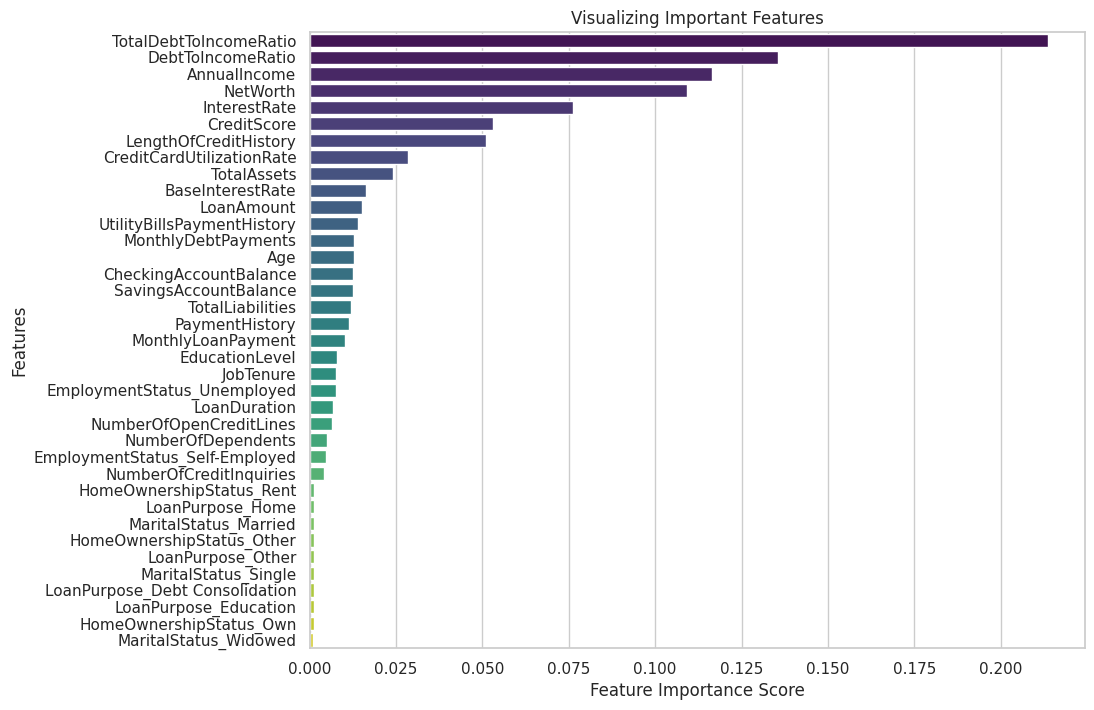

In [41]:
# Create the plot with sorted feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [42]:
# Set a threshold
threshold = 0.01

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print("Selected Features:")
print(selected_features)

# If you want to use the selected features for your dataset X
x_selected = x[selected_features['Feature']]


Selected Features:
                       Feature  Importance
24      TotalDebtToIncomeRatio    0.213597
11           DebtToIncomeRatio    0.135675
1                 AnnualIncome    0.116523
20                    NetWorth    0.109288
22                InterestRate    0.076221
2                  CreditScore    0.053042
13       LengthOfCreditHistory    0.051105
8    CreditCardUtilizationRate    0.028539
16                 TotalAssets    0.024010
21            BaseInterestRate    0.016211
4                   LoanAmount    0.015026
18  UtilityBillsPaymentHistory    0.014093
7          MonthlyDebtPayments    0.012954
0                          Age    0.012951
15      CheckingAccountBalance    0.012683
14       SavingsAccountBalance    0.012544
17            TotalLiabilities    0.012031
12              PaymentHistory    0.011387
23          MonthlyLoanPayment    0.010157


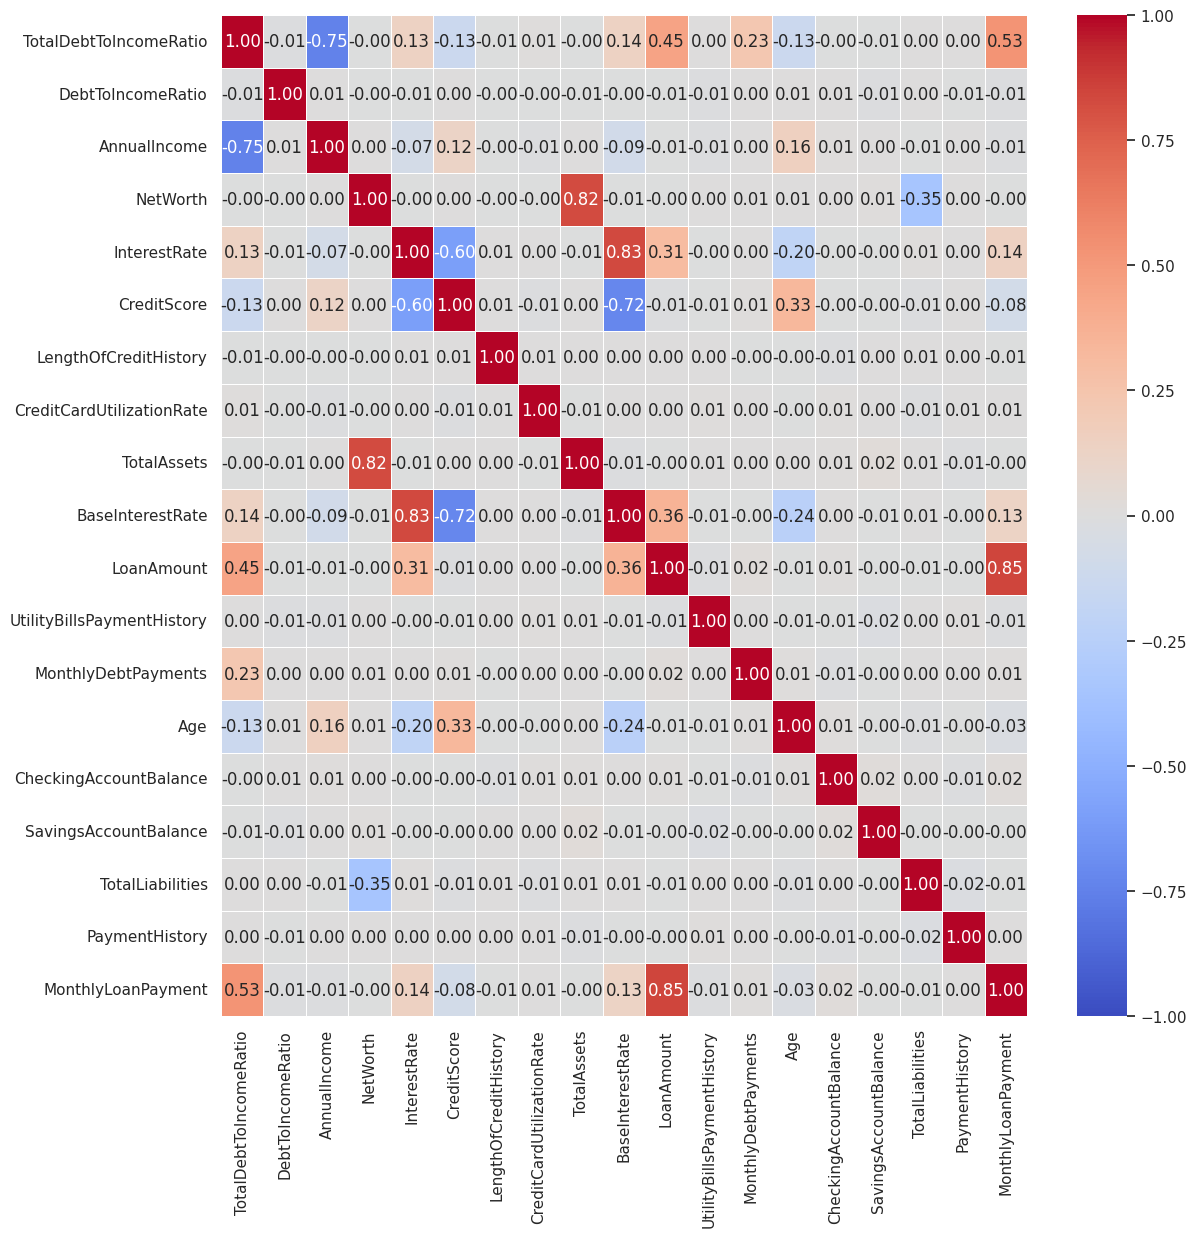

In [43]:
correlation_matrix=x_selected.corr()
correlation_matrix


plt.figure(figsize=(13,13))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
#plt.title('Correlation Heatmap')
plt.show()


### **3. Split Data into Training and Testing Sets**

In [44]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x_selected,y,test_size=0.2,random_state=42)



# Print the shape of the training and testing sets
print(f"Training set features shape: {x_train.shape}")
print(f"Testing set features shape: {x_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")

Training set features shape: (16000, 19)
Testing set features shape: (4000, 19)
Training set target shape: (16000,)
Testing set target shape: (4000,)


###**4.Feature Scaling:**

In [45]:

# Apply StandardScaler only to numerical columns
#Standardization
standard_scaler = StandardScaler()


# Fit only on training data
x_train_scaled = standard_scaler.fit_transform(x_train)

# Transform test data with the same scaler
x_test_scaled = standard_scaler.transform(x_test)

✍ **Standardization Applied:** The StandardScaler was applied only to the numeric columns in both the training and testing datasets. This ensures that all numerical features have zero mean and unit variance, which is crucial for models sensitive to scale (e.g., linear regression, logistic regression, and neural networks).

**Data Integrity Maintained:** The dataset structure remains unchanged, as indicated by the output shapes

## **Build the Model**
✍ After preprocessing the dataset, including feature scaling and analyzing class balance, we now proceed with model building. The goal is to develop a **predictive model** that can Predict 'financial Risk score' based on datas available in the loan application.

###**Steps in Model Building**
**Model Selection** – Choose different machine learning algorithms to compare performance.            
**Training the Models** – Fit models to the training data.                        
**Evaluation Metrics** – Assess models using Mean Squared Error and R2Score

###**Regression**
1. Linear Regression
2. Descision Tree Regressor
3. Randome Forest Regressor
4. Support Vector Regressor
5. Gradient Booster Regressor

**1) Linear Regression:** Linear Regression is the simplest form of regression that models the relationship between a dependent variable and one or more independent variables using a straight line. It works best when the relationship is linear and data is homoscedastic (equal variance).

**2) SVR (Support Vector Regression):**

SVR is a regression version of the Support Vector Machine. It tries to fit the best line within a specified margin (epsilon). It works well for both linear and non-linear relationships using kernel functions.

**3) Decision Tree:**

A Decision Tree Regressor splits the data into branches based on feature thresholds and predicts the average value of the target variable in each leaf node. It can model complex, non-linear relationships.

**4) Random Forest:**

Random Forest for regression averages the predictions from multiple decision trees trained on different subsets of data. It reduces overfitting and improves accuracy, especially on non-linear datasets.


**5) Gradient Boosting:**

Gradient Boosting for regression builds models sequentially, with each new tree correcting the errors made by the previous ones. It results in a powerful ensemble model capable of capturing complex relationships and patterns in the data.


In [46]:
#defining models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()

}


#train and evaluate
results = {}
for name, model in models.items():
  if name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
  else:
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
  #Calculate metrices:
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[name] = {'MSE': mse, 'R-squared': r2}
#Conert results to dataframe
results_df = pd.DataFrame(results).T
results_df

,MSE,R-squared
Linear Regression,27.410302,0.554327
Decision Tree,45.077060,0.267077
Random Forest,21.864795,0.644493
Support Vector Machine,22.987054,0.626246
Gradient Boosting,20.769811,0.662297


###**Model Evaluation**
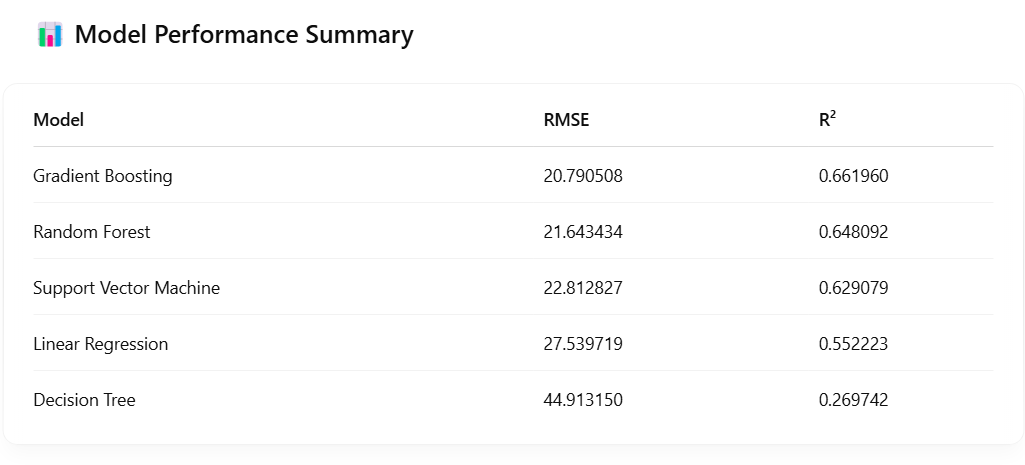

###**👁👁Interpretation**
####✅**Top Performing Models**
**Gradient Boosting:** Exhibits the lowest RMSE and highest R², indicating the most accurate predictions and best fit among the models.​

**Random Forest:** Performs closely to Gradient Boosting, with slightly higher RMSE and slightly lower R².​

####👍**Other Competitive Models:**
**Support Vector Machine:** Offers moderate performance, better than Linear Regression and Decision Tree but not as strong as the ensemble methods.​

**Linear Regression:** Shows higher error and lower variance explanation, suggesting limited predictive capability in this context.​
####⚠️**Lower Performing Model:**
**Decision Tree:** Has the highest RMSE and lowest R², indicating poor predictive performance and fit.​



###**📌 Conclusion**
Considering both RMSE and R² metrics, **Gradient Boosting** emerges as the top-performing model, followed closely by **Random Forest**. These ensemble methods effectively capture complex patterns in the data, leading to more accurate predictions.​









###**Hyper Parameter Tuning**

In [47]:
#Applying Hyperparameter tuning for all models
#Dictionary to store result
results=[] # Initialize results as a list

# Define models and their hyperparameter grids

models={
    'Linear Regression': {'model': LinearRegression(), 'params': {'fit_intercept': [True, False]}},
    'Decision Tree': {'model': DecisionTreeRegressor(), 'params': {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}},
    'Random Forest': {'model': RandomForestRegressor(), 'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}},
    'Support Vector Machine': {'model': SVR(), 'params': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}}, # Updated params for SVR
    'Gradient Boosting': {'model': GradientBoostingRegressor(), 'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}}

    }



# Run GridSearchCV for each model
for name, mp in models.items():
    print(f" Tuning {name}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='r2', n_jobs=-1)

    # Use appropriate data based on model type
    if name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
        grid.fit(x_train, y_train)
    else:
        grid.fit(x_train_scaled, y_train)

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Best R²': round(grid.best_score_, 4)
    })

# Create summary table
results_df = pd.DataFrame(results).sort_values(by='Best R²', ascending=False)
print("\n Model Performance Summary:")
print(results_df)

 Tuning Linear Regression...
 Tuning Decision Tree...
 Tuning Random Forest...
 Tuning Support Vector Machine...
 Tuning Gradient Boosting...

 Model Performance Summary:
                    Model                                  Best Params  \
4       Gradient Boosting  {'learning_rate': 0.1, 'n_estimators': 200}   
2           Random Forest     {'max_depth': None, 'n_estimators': 200}   
3  Support Vector Machine                   {'C': 10, 'kernel': 'rbf'}   
0       Linear Regression                      {'fit_intercept': True}   
1           Decision Tree     {'max_depth': 5, 'min_samples_split': 2}   

   Best R²  
4   0.6516  
2   0.6329  
3   0.6143  
0   0.5430  
1   0.4786  


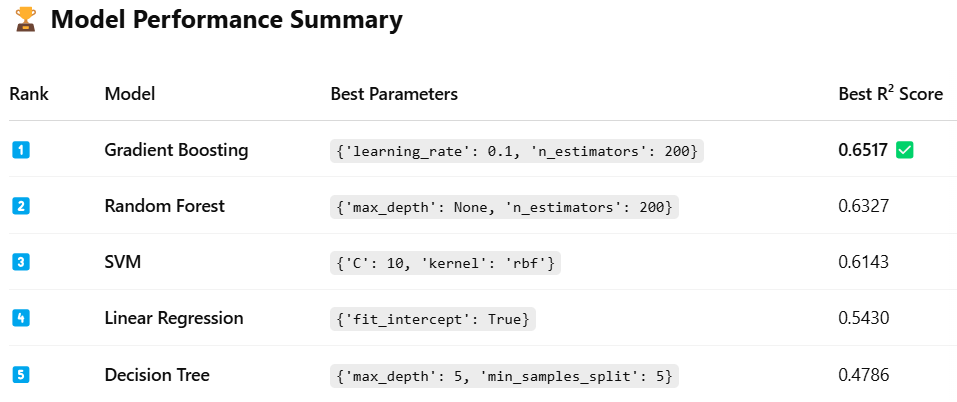

 **👁👁👁Interpretation**

**Gradient Boosting:** Achieves the highest R² score, indicating it explains approximately 65.11% of the variance in the target variable. This suggests strong predictive performance.​

**Random Forest:** Closely follows Gradient Boosting with a R² of 63.20%, showcasing robust performance and the ability to handle complex data structures.​

**Support Vector Machine (SVM):** With a R² of 61.30%, SVM demonstrates competent performance, particularly effective in capturing non-linear relationships

**Linear Regression:** A R² of 54.20% indicates moderate performance, suitable for datasets with linear relationships but may underperform with complex patterns.​

**Decision Tree:** The lowest R² at 47.86% suggests limited predictive capability, potentially due to overfitting or lack of complexity in capturing data patterns.​

**📌Conclusion**
Considering the R² scores, **Gradient Boosting** emerges as the top-performing model, effectively capturing the variance in the data. **Random Forest** and **Support Vector Machine** also demonstrate strong performances, making them viable alternatives depending on specific dataset characteristics and computational considerations.

####**Performance Analysis of Models After and Before Tuning**

In [48]:
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'Decision Tree'],
    'Accuracy (Before tuning)' : [0.552223,0.648092,0.661960,0.629079,0.269742],
    'Accuracy (After tuning)' : [0.5430,0.6327,0.6517,0.6143,0.4786]
}

Analysis_DF=pd.DataFrame(data)
Analysis_DF

,Model,Accuracy (Before tuning),Accuracy (After tuning)
0,Linear Regression,0.552223,0.5430
1,Random Forest,0.648092,0.6327
2,Gradient Boosting,0.661960,0.6517
3,Support Vector Machine,0.629079,0.6143
4,Decision Tree,0.269742,0.4786



As per the performance analysis **Best performing model** is **Gradient Boosting.**

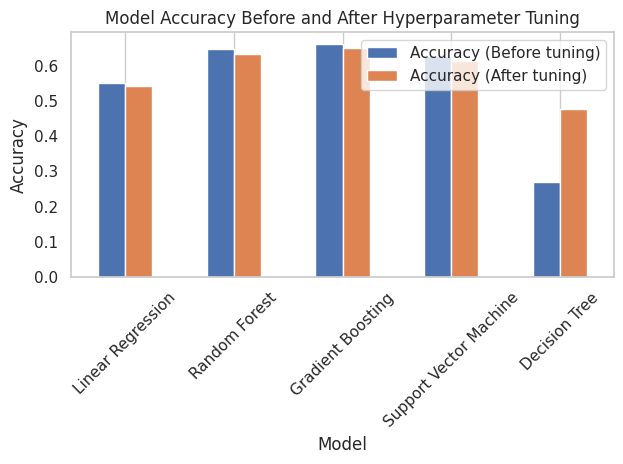

In [49]:
#Plotting the accuracy comparison before and after tuning
Analysis_DF.set_index('Model').plot(kind = 'bar')
plt.title('Model Accuracy Before and After Hyperparameter Tuning')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


####**📊 Model Accuracy Comparison: Before vs After Hyperparameter Tuning**
####**🔍 Overview**
This bar chart visualizes the accuracy of different regression models before and after hyperparameter tuning. Each model’s performance was fine-tuned to extract the best possible results from the dataset.

**🏆 Gradient Boosting:**

Has the highest accuracy both before and after tuning.

Shows a slight improvement post-tuning, suggesting it's already well-performing but benefits from fine-tuning.

**🌲 Random Forest:**

Also performs very well overall.

The improvement after tuning is noticeable but modest, showing stability and robustness.

**💻 Support Vector Machine (SVM):**

Shows clear improvement after tuning.

Likely benefited from selecting the right kernel and regularization (C).

**📉 Decision Tree:**

Starts with the lowest accuracy before tuning.

Biggest relative improvement after tuning, but still lower than ensemble models.

Indicates it’s more prone to overfitting or underfitting without parameter optimization.

**📏 Linear Regression:**

Performance is steady, with almost no difference before and after tuning.

Suggests it’s less sensitive to hyperparameter tuning (only has few tunable parameters like fit_intercept).



###**Save the Model**

In [50]:
import joblib
from sklearn.ensemble import GradientBoostingRegressor
joblib.dump(GradientBoostingRegressor(), 'GradientBoostingRegressor.pkl')

['GradientBoostingRegressor.pkl']

###**Pipeline  for Machine learning**

In [51]:
#Data Preprocessing pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

#Data Preprocessing pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
x=DF1.drop('RiskScore',axis=1)
y=DF1['RiskScore']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)



#Define columns for the ColumnTransformer
num_cols=DF1.select_dtypes(exclude=['object']).drop('RiskScore', axis=1).columns.tolist()
nom_cat_cols=['MaritalStatus', 'EmploymentStatus', 'HomeOwnershipStatus', 'LoanPurpose']
ord_cat_cols=['EducationLevel']



nom_cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])
ord_cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder()),
    ('scaler',StandardScaler())
])

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

#Combine preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('nom_cat', nom_cat_pipeline, nom_cat_cols),
        ('ord_cat', ord_cat_pipeline, ord_cat_cols)
    ],
    remainder='passthrough'  # or 'drop' if you want to exclude other columns
)

feature_selector = SelectFromModel(
    estimator=RandomForestRegressor(n_estimators=300, random_state=42),
    threshold=0.01)
x=DF1.drop('RiskScore',axis=1)
y=DF1['RiskScore']


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


nom_cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])
ord_cat_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder()),
    ('scaler',StandardScaler())
])

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

#Combine preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('nom_cat', nom_cat_pipeline, nom_cat_cols),
        ('ord_cat', ord_cat_pipeline, ord_cat_cols)
    ],
    remainder='passthrough'  # or 'drop' if you want to exclude other columns
)

feature_selector = SelectFromModel(
    estimator=RandomForestRegressor(n_estimators=300, random_state=42),
    threshold=0.01)

In [52]:
#Model Selection and Training
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split




final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('model', GradientBoostingRegressor())
])


#Evaluate the model
final_pipeline.fit(xtrain, ytrain)

y_pred = final_pipeline.predict(xtest)


##print("MSE:", mean_squared_error(ytest, y_pred))
##print("R²:", r2_score(ytest, y_pred))

preprocessor_cols = preprocessor.transformers_[0][2]
if 'LoanApproved' in preprocessor_cols:
    preprocessor_cols.remove('LoanApproved')
preprocessor.transformers_[0] = (preprocessor.transformers_[0][0], preprocessor.transformers_[0][1], preprocessor_cols)



In [55]:
#save the pipeline
import joblib
joblib.dump(final_pipeline, 'Loan_Risk_Score.pkl')


['Loan_Risk_Score.pkl']

In [57]:
new_data=pd.read_excel("/content/sample data.xlsx")
new_data

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,48,38453,595,Unemployed,High School,26,30517,48,Divorced,0,...,3481,3204.416667,0.793543,6,42871,0.228017,0.226231,971.823060,0.478035,0
1,42,99920,582,Self-Employed,Bachelor,20,23363,12,Single,3,...,23569,8326.666667,0.729776,10,4209,0.197363,0.175436,2136.847993,0.292416,1
2,38,57860,591,Employed,High School,20,25576,96,Married,4,...,25653,4821.666667,0.841298,8,437436,0.265076,0.287655,683.404351,0.174712,0
3,36,30890,590,Employed,High School,16,10176,24,Divorced,2,...,28334,2574.166667,0.808569,7,14676,0.190176,0.176527,506.321521,0.308963,0
4,22,15561,500,Employed,High School,1,20169,36,Single,2,...,5913,1296.750000,0.598246,4,11052,0.255169,0.242390,793.820908,0.878983,0
5,31,105957,530,Employed,High School,7,53987,72,Single,0,...,69541,8829.750000,0.525186,3,95758,0.303987,0.326751,1718.377313,0.239800,0
6,34,82887,545,Employed,High School,13,20996,84,Divorced,2,...,117394,6907.250000,0.904931,2,4958,0.273496,0.279583,571.787872,0.150970,0
7,52,53555,631,Employed,Associate,31,29418,60,Divorced,1,...,27582,4462.916667,0.800298,4,2753,0.218918,0.217664,808.590559,0.230699,0
8,44,105639,627,Employed,High School,20,20409,108,Widowed,0,...,22300,8803.250000,0.623228,5,142935,0.251909,0.263740,495.951575,0.100298,0
9,18,58342,519,Employed,High School,0,10077,24,Single,3,...,15562,4861.833333,0.949536,8,9558,0.225577,0.260699,543.249360,0.233502,0


In [58]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         17 non-null     int64  
 1   AnnualIncome                17 non-null     int64  
 2   CreditScore                 17 non-null     int64  
 3   EmploymentStatus            17 non-null     object 
 4   EducationLevel              17 non-null     object 
 5   Experience                  17 non-null     int64  
 6   LoanAmount                  17 non-null     int64  
 7   LoanDuration                17 non-null     int64  
 8   MaritalStatus               17 non-null     object 
 9   NumberOfDependents          17 non-null     int64  
 10  HomeOwnershipStatus         17 non-null     object 
 11  MonthlyDebtPayments         17 non-null     int64  
 12  CreditCardUtilizationRate   17 non-null     float64
 13  NumberOfOpenCreditLines     17 non-nu

In [60]:
import joblib
model=joblib.load("Loan_Risk_Score.pkl")
predictions=model.predict(new_data)
predictions

array([53.53019143, 43.30968529, 48.78270832, 52.80145718, 54.91670995,
       56.63790699, 51.75029996, 48.03561335, 48.24523045, 51.75029996,
       33.27316821, 52.79579992, 50.94729046, 39.99399405, 39.54081357,
       51.62913087, 47.22461111])